### Student Information
Name: 段凱文

Student ID: 107065527

GitHub ID: kevin810323

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

In [1]:
websites = ['amazon', 'imdb', 'yelp']

In [12]:
data = []
with open('amazon.txt') as f:
    for line in f:
        temp = line.strip().split('\t')
        data.append((temp[0], temp[1], 'amazon'))
with open('yelp.txt') as f:
    for line in f:
        temp = line.strip().split('\t')
        data.append((temp[0], temp[1], 'yelp'))
with open('imdb.txt') as f:
    for line in f:
        temp = line.strip().split('\t')
        data.append((temp[0], temp[1], 'imdb'))    
    

In [15]:
data[1050]

('We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.',
 '1',
 'yelp')

In [2]:
import pandas as pd


In [19]:
X = pd.DataFrame.from_records(data, columns= ['sentence', 'score', 'website'])

In [20]:
X[:10]

,sentence,score,website
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [21]:
#check missing value
X.isnull()

,sentence,score,website
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [22]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
website     (The amoung of missing records is: , 0)
dtype: object

In [24]:
#Duplicate data
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [25]:
sum(X.duplicated())

17

In [29]:
# we drop the duplicates but keep one copy
X.drop_duplicates(inplace=True)

In [30]:
sum(X.duplicated())

0

In [31]:
len(X)

2966

In [32]:
# sampling
X_sample = X.sample(n=1000)

In [33]:
X_sample[0:10]

,sentence,score,website
1386,I will come back here every time I'm in Vegas.,1,yelp
2731,It handles some tough issues with dignity and ...,1,imdb
821,"That being said, for a phone, the camera is ve...",1,amazon
2364,Damian is so talented and versatile in so many...,1,imdb
2927,It was a long time that i didn't see a so char...,1,imdb
2663,Also notable is John Bailey's fine crisp beaut...,1,imdb
200,The color is even prettier than I thought it w...,1,amazon
2272,Everything about this film is simply incredibl...,1,imdb
1321,"Also, the fries are without a doubt the worst ...",0,yelp
124,Gets the job done.,1,amazon


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
websites

['amazon', 'imdb', 'yelp']

In [37]:
print(X.website.value_counts())


imdb      994
yelp      992
amazon    980
Name: website, dtype: int64


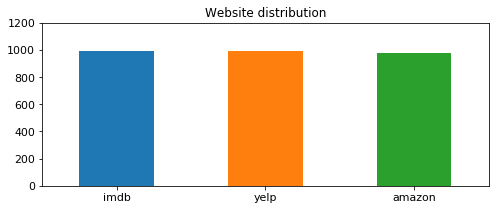

In [39]:
X.website.value_counts().plot(kind = 'bar',
                                    title = 'Website distribution',
                                    ylim = [0, 1200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [48]:
pos = X[X.score=='1']
neg = X[X.score=='0']

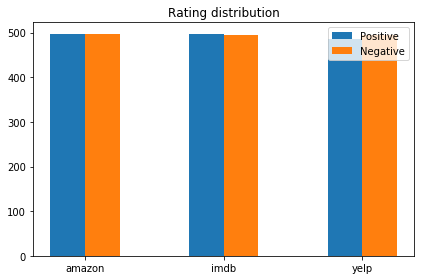

In [50]:

x = np.arange(len(websites))
fig, ax = plt.subplots()
rect1 = ax.bar(x - 0.25/2, pos.website.value_counts(), 0.25, label='Positive')
rect2 = ax.bar(x + 0.25/2, neg.website.value_counts(), 0.25, label='Negative')

ax.set_title('Rating distribution')
ax.set_xticks(x)
ax.set_xticklabels(websites)
ax.legend()
fig.tight_layout()

plt.show()

In [51]:
pos.website.value_counts()

yelp      498
imdb      496
amazon    486
Name: website, dtype: int64

In [52]:
neg.website.value_counts()

imdb      498
amazon    494
yelp      494
Name: website, dtype: int64

In [53]:
orig = X.website.value_counts()
samp = X_sample.website.value_counts()

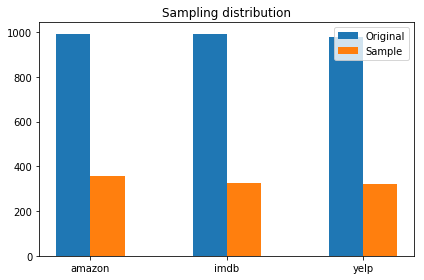

In [55]:
x = np.arange(len(websites))
fig, ax = plt.subplots()
rect1 = ax.bar(x - 0.25/2, orig, 0.25, label='Original')
rect2 = ax.bar(x + 0.25/2, samp, 0.25, label='Sample')

ax.set_title('Sampling distribution')
ax.set_xticks(x)
ax.set_xticklabels(websites)
ax.legend()
fig.tight_layout()

plt.show()

In [57]:
# NLP processing
import nltk

In [58]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [59]:
X[:10]

,sentence,score,website,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [63]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [64]:
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [65]:
X_counts.shape

(2966, 5153)

In [66]:
count_vect.get_feature_names()[5000:5020]

['websites',
 'wedding',
 'wedges',
 'week',
 'weekend',
 'weekly',
 'weeks',
 'weight',
 'weird',
 'welcome',
 'well',
 'welsh',
 'went',
 'were',
 'weren',
 'what',
 'whatever',
 'whatsoever',
 'whelm',
 'when']

In [72]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[500:540]]

In [69]:
plot_y = ["sent_"+ str(i) for i in list(X.index)[0:40]]

In [70]:
plot_z = X_counts[0:40, 0:40].toarray()

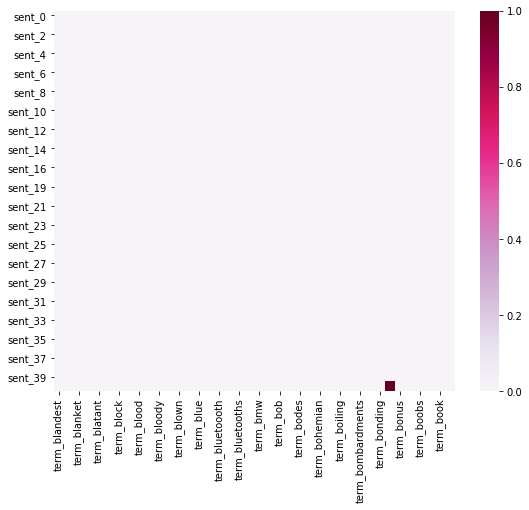

In [74]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd")
                 #vmin=0, vmax=1, annot=True)

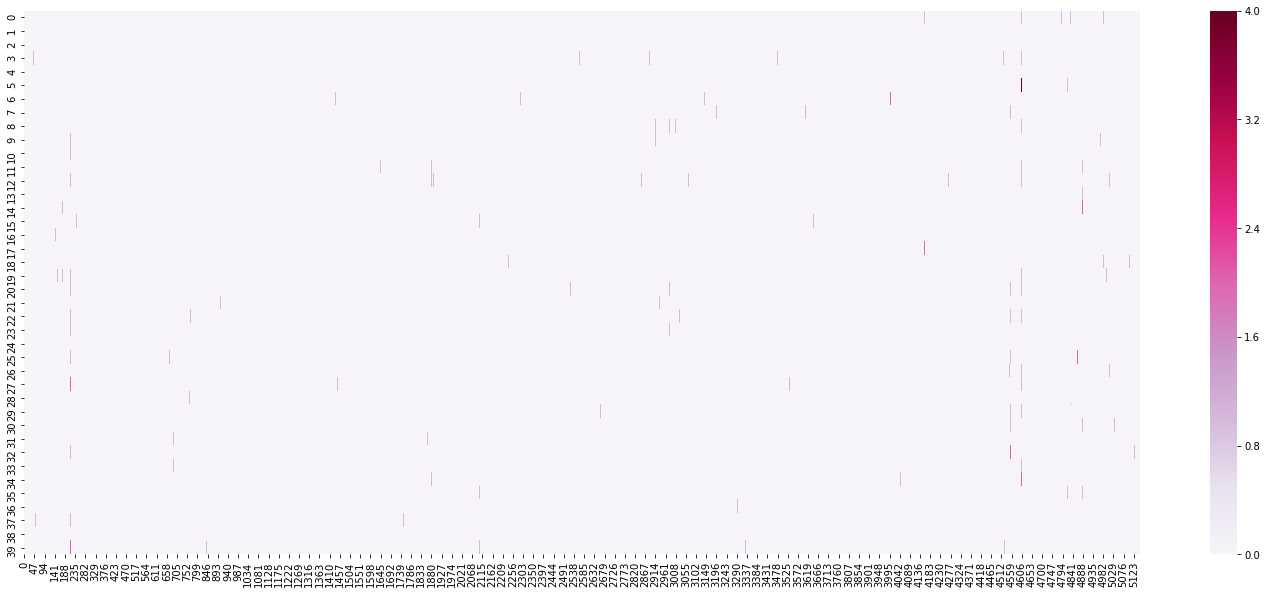

In [77]:
plot_z = X_counts[0:40].toarray()
df_todraw = pd.DataFrame(plot_z )
plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd")
                 #vmin=0, vmax=1, annot=True)

In [78]:
from sklearn.decomposition import PCA